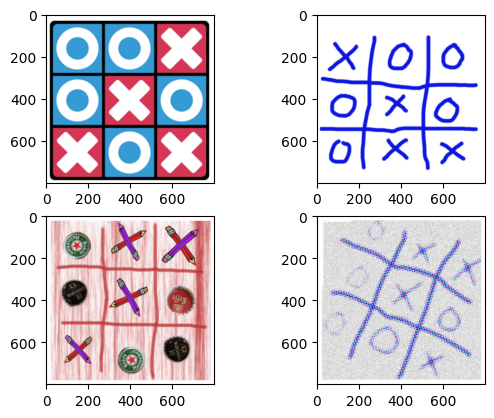

In [36]:
import cv2
import matplotlib.pyplot as plt
import utils as u

import importlib
importlib.reload(u)

ima = u.read_and_resize(800, "img/ima.png")
imb = u.read_and_resize(800, "img/imb.png")
imc = u.read_and_resize(800, "img/imc.png")
imd = u.read_and_resize(800, "img/imd.png")

plt.figure()
plt.subplot(2, 2, 1)
u.show(ima)
plt.subplot(2, 2, 2)
u.show(imb)
plt.subplot(2, 2, 3)
u.show(imc)
plt.subplot(2, 2, 4)
u.show(imd)


## Érosion

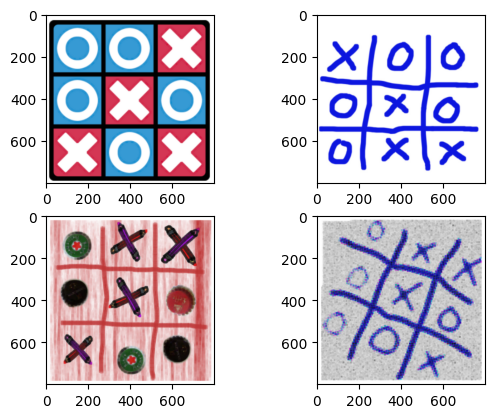

In [37]:
kernel = 3
element = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2*kernel + 1, 2*kernel + 1), (kernel, kernel))

erode_a = cv2.erode(ima, element)
erode_b = cv2.erode(imb, element)
erode_c = cv2.erode(imc, element)
erode_d = cv2.erode(imd, element)

plt.figure()
plt.subplot(2, 2, 1)
u.show(erode_a)
plt.subplot(2, 2, 2)
u.show(erode_b)
plt.subplot(2, 2, 3)
u.show(erode_c)
plt.subplot(2, 2, 4)
u.show(erode_d)


## Median blur

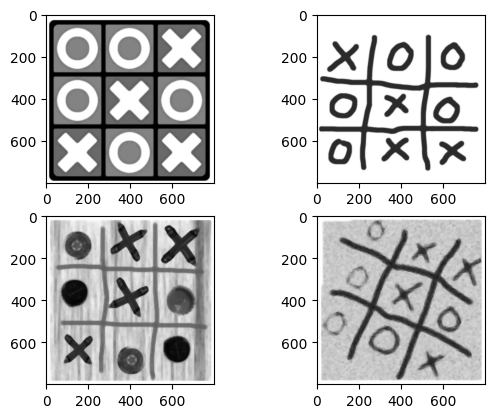

In [38]:

gray_a = cv2.cvtColor(erode_a, cv2.COLOR_BGR2GRAY)
gray_b = cv2.cvtColor(erode_b, cv2.COLOR_BGR2GRAY)
gray_c = cv2.cvtColor(erode_c, cv2.COLOR_BGR2GRAY)
gray_d = cv2.cvtColor(erode_d, cv2.COLOR_BGR2GRAY)

median_a = cv2.medianBlur(gray_a, 11)
median_b = cv2.medianBlur(gray_b, 11)
median_c = cv2.medianBlur(gray_c, 11)
median_d = cv2.medianBlur(gray_d, 11)

plt.figure()
plt.subplot(2, 2, 1)
u.show(median_a)
plt.subplot(2, 2, 2)
u.show(median_b)
plt.subplot(2, 2, 3)
u.show(median_c)
plt.subplot(2, 2, 4)
u.show(median_d)


## Canny

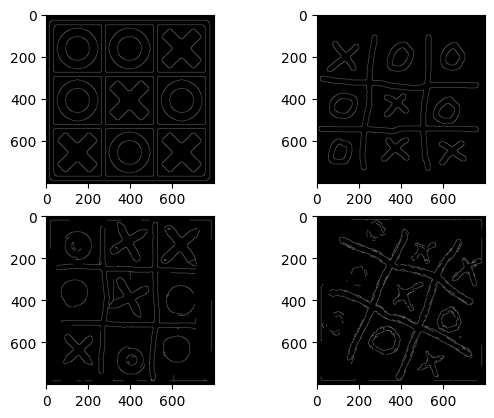

In [39]:

canny_a = cv2.Canny(median_a, 100, 200)
canny_b = cv2.Canny(median_b, 100, 200)
canny_c = cv2.Canny(median_c, 100, 200)
canny_d = cv2.Canny(median_d, 100, 200)

plt.figure()
plt.subplot(2, 2, 1)
u.show(canny_a)
plt.subplot(2, 2, 2)
u.show(canny_b)
plt.subplot(2, 2, 3)
u.show(canny_c)
plt.subplot(2, 2, 4)
u.show(canny_d)


## Dilatation

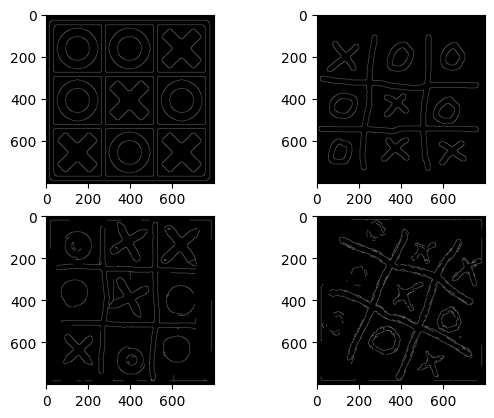

In [40]:
kernel = 0
element = cv2.getStructuringElement(
    cv2.MORPH_RECT, (2*kernel + 1, 2*kernel + 1), (kernel, kernel))

dilate_a = cv2.dilate(canny_a, element)
dilate_b = cv2.dilate(canny_b, element)
dilate_c = cv2.dilate(canny_c, element)
dilate_d = cv2.dilate(canny_d, element)

plt.figure()
plt.subplot(2, 2, 1)
u.show(dilate_a)
plt.subplot(2, 2, 2)
u.show(dilate_b)
plt.subplot(2, 2, 3)
u.show(dilate_c)
plt.subplot(2, 2, 4)
u.show(dilate_d)


## Grid recogniton

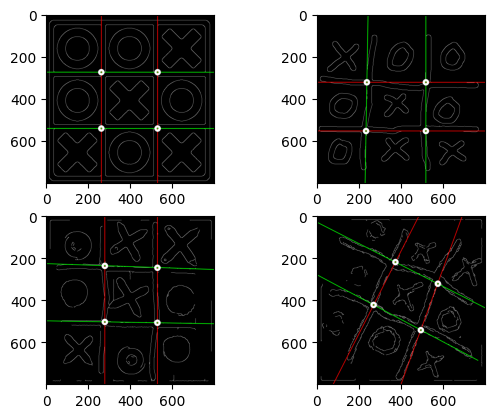

In [41]:
lines_a, corners_a = u.locate_grid(dilate_a, gray_a)
lines_b, corners_b = u.locate_grid(dilate_b, gray_b)
lines_c, corners_c = u.locate_grid(dilate_c, gray_c)
lines_d, corners_d = u.locate_grid(dilate_d, gray_d)

plt.figure()
plt.subplot(2, 2, 1)
u.show(lines_a)
plt.subplot(2, 2, 2)
u.show(lines_b)
plt.subplot(2, 2, 3)
u.show(lines_c)
plt.subplot(2, 2, 4)
u.show(lines_d)


## Grid rotation

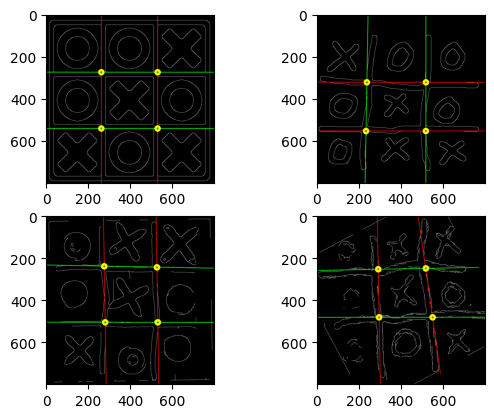

In [42]:
rotate_a, corners_t_a, ima_rotate = u.rotate(lines_a, corners_a, ima)
rotate_b, corners_t_b, imb_rotate = u.rotate(lines_b, corners_b, imb)
rotate_c, corners_t_c, imc_rotate = u.rotate(lines_c, corners_c, imc)
rotate_d, corners_t_d, imd_rotate = u.rotate(lines_d, corners_d, imd)

plt.figure()
plt.subplot(2, 2, 1)
u.show(rotate_a)
plt.subplot(2, 2, 2)
u.show(rotate_b)
plt.subplot(2, 2, 3)
u.show(rotate_c)
plt.subplot(2, 2, 4)
u.show(rotate_d)


## Zoning

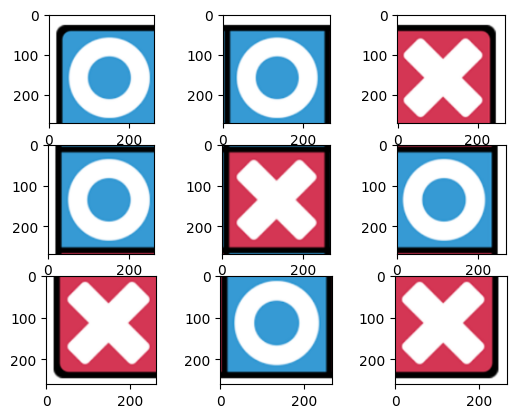

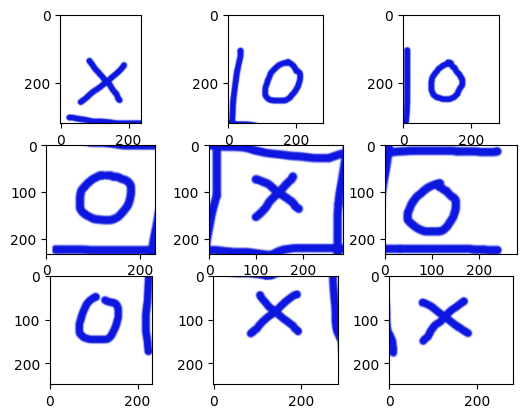

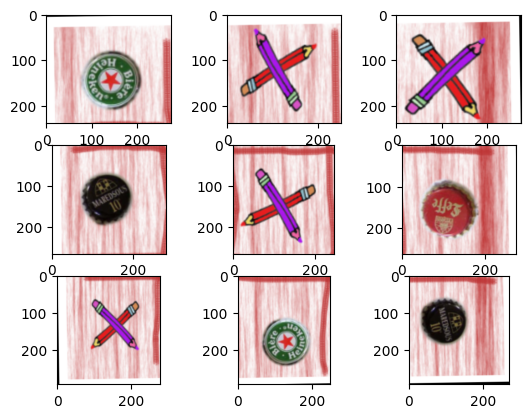

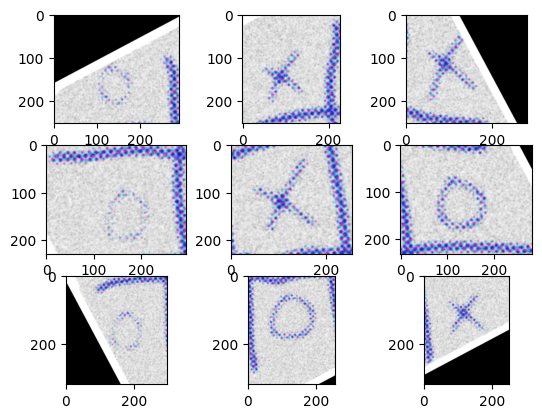

In [43]:
u.zoning(corners_t_a, ima_rotate)
u.zoning(corners_t_b, imb_rotate)
u.zoning(corners_t_c, imc_rotate)
u.zoning(corners_t_d, imd_rotate)


## Shape detection

[tuto](https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/)